<a href="https://colab.research.google.com/github/yashveersinghsohi/Hands_On_ML_Book_Practice/blob/master/Chapter_6/Practice_Chapter6_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Packages

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from sklearn.datasets import load_iris
from sklearn.tree import (
    DecisionTreeClassifier, 
    export_graphviz, 
    DecisionTreeRegressor
  )

# Visualizing a Decision Tree

In [13]:
iris = load_iris()
X, y = iris.data[:, 2:], iris.target

In [14]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [15]:
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
  )

In [16]:
!dot -Tpng iris_tree.dot -o iris_tree.png

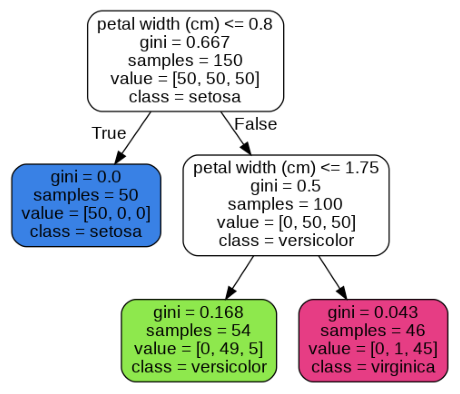

In [17]:
img = cv2.imread("/content/iris_tree.png")

plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")
plt.show()

In [18]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [19]:
tree_clf.predict([[5, 1.5]])

array([1])

# Regression

In [20]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [21]:
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [22]:
export_graphviz(
    tree_reg,
    out_file="regression_tree.dot",
    feature_names=["x1"],
    rounded=True,
    filled=True
  )

In [23]:
!dot -Tpng regression_tree.dot -o regression_tree.png

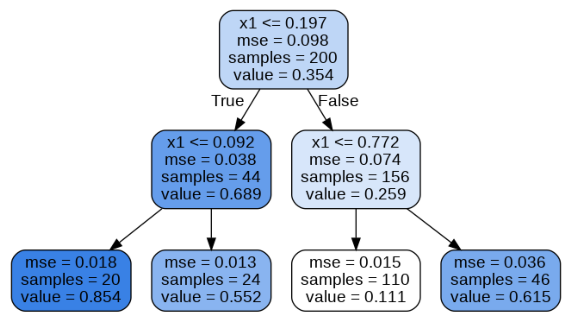

In [24]:
img = cv2.imread("/content/regression_tree.png")

plt.figure(figsize=(10, 7))
plt.imshow(img)
plt.axis("off")
plt.show()